In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [6]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3) 

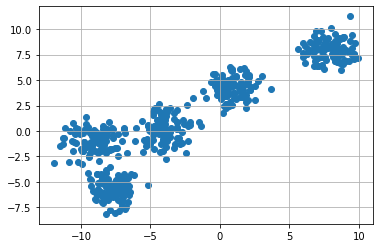

In [10]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [11]:
k = 5

color = ["green","red","blue","yellow","orange"]
clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster={
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster

In [12]:
print(clusters)

{0: {'center': array([-7.11344516,  1.73875868]), 'points': [], 'color': 'green'}, 1: {'center': array([2.62374065, 7.91777785]), 'points': [], 'color': 'red'}, 2: {'center': array([-1.3150697 , -8.74820208]), 'points': [], 'color': 'blue'}, 3: {'center': array([-9.45560649,  1.39942419]), 'points': [], 'color': 'yellow'}, 4: {'center': array([-8.46969652, -5.60749994]), 'points': [], 'color': 'orange'}}


In [13]:
def distance(v1,v2):
    return np.sqrt(np.sum(v1-v2)**2)


In [32]:
def assignToClusters(clusters):    
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
def updateClusters(clusters):
        for kx in range(k):
            pts = np.array(clusters[kx]['points'])
            
            if(pts.shape[0]>0):
                new_u = pts.mean(axis=0)
                clusters[kx]['center'] = new_u
                clusters[kx]['points'] = []
                

def plotClusters(clusters):
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        pts = np.array(clusters[kx]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

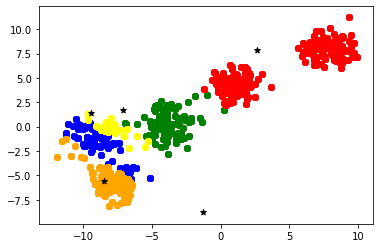

In [33]:
plotClusters(clusters)

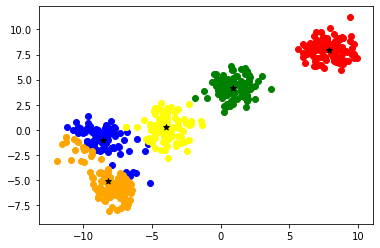

In [45]:
assignToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

In [46]:
#USING SCI-KIT LEARN

In [47]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [48]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [51]:
from sklearn.cluster import KMeans

In [52]:
kmeans = KMeans(n_clusters=5)


In [53]:
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
centers = kmeans.cluster_centers_

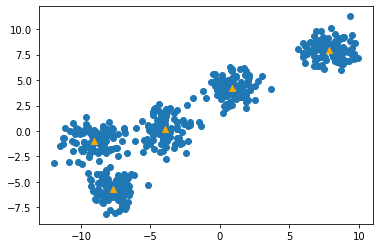

In [59]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],marker='^',color='orange')
plt.show()

In [63]:
pred = kmeans.labels_